In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/drive/MyDrive/incubator/incubator_riset.zip'                #Mendefinisikan file zip yang akan diekstrak
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/drive/MyDrive/ImageIncubator/incubator_riset/')      #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

# Menyiapkan folder untuk data gambar Chick, Eggs, Hatching

In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_chick = os.path.join('/content/drive/MyDrive/ImageIncubator/incubator_riset/chick-ready')                #Mendefinisikan Folder Training untuk gambar Gunting
fold_eggs= os.path.join('/content/drive/MyDrive/ImageIncubator/incubator_riset/egg_ready')                        #Mendefinisikan Folder Training untuk gambar Batu
fold_hatching = os.path.join('/content/drive/MyDrive/ImageIncubator/incubator_riset/hatch_ready')                    #Mendefinisikan Folder Training untuk gambar Kertas

print('Jumlah total gambar chick:', len(os.listdir(fold_chick)))              #Menampilkan jumlah gambar di dalam folder Gunting
print('Jumlah total gambar eggs:', len(os.listdir(fold_eggs)))                    #Menampilkan jumlah gambar di dalam folder Batu
print('Jumlah total gambar hatching:', len(os.listdir(fold_hatching)))                #Menampilkan jumlah gambar di dalam folder Kertas

print("Menampilkan nama file gambar:")
file_chick = os.listdir(fold_chick)                                           #Mendaftar file di dalam folder gunting
print("Chick:",file_chick[:5])                                                #Menampilkan nama 5 file pertama di dalam folder gunting

file_eggs = os.listdir(fold_eggs)                                                 #Mendaftar file di dalam folder batu
print("Egg:",file_eggs[:5])                                                      #Menampilkan nama 5 file pertama di dalam folder batu

file_hatching = os.listdir(fold_hatching)                                             #Mendaftar file di dalam folder kertas
print("Hatching:",file_hatching[:5])                                                  #Menampilkan nama 5 file pertama di dalam folder kertas

Jumlah total gambar chick: 1470
Jumlah total gambar eggs: 1719
Jumlah total gambar hatching: 1715
Menampilkan nama file gambar:
Chick: ['1420.jpg', '1421.jpg', '1422.jpg', '1423.jpg', '1424.jpg']
Egg: ['1646.jpg', '1647.jpg', '1648.jpg', '1649.jpg', '165.jpg']
Hatching: ['1642.jpg', '1643.jpg', '1644.jpg', '1645.jpg', '1646.jpg']


# Menampilkan Gambar

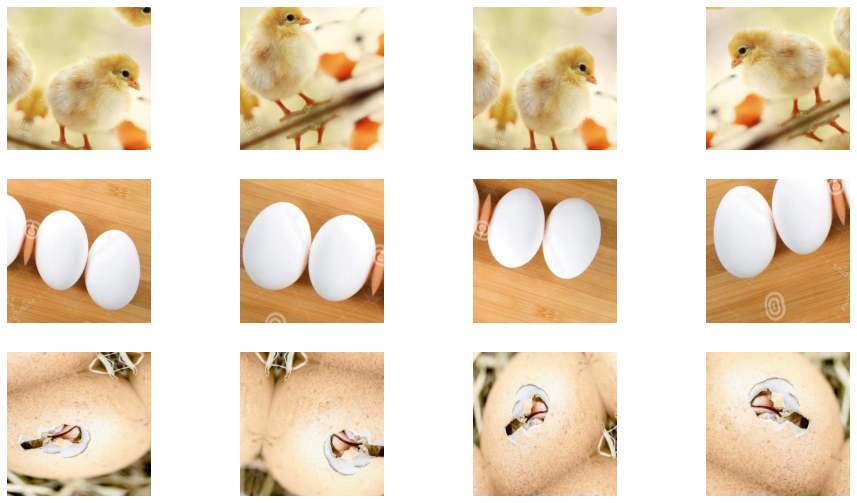

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                         #Jumlah baris tampilan gambar
ncols = 4                                                                         #Jumlah baris tampilan gambar

pic_index = 0                                                                     #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                    #Index tambah bertambah 4 setiap baris
gbr_tampil_chick  = [os.path.join(fold_chick, fname)                          #Menampilkan gambar gunting
                      for fname in file_chick[pic_index-4:pic_index]]
gbr_tampil_eggs     = [os.path.join(fold_eggs, fname)                             #Menampilkan gambar batu
                      for fname in file_eggs[pic_index-4:pic_index]]
gbr_tampil_hatching   = [os.path.join(fold_hatching, fname)                           #Menampilkan gambar kertas
                      for fname in file_hatching[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_chick+gbr_tampil_eggs+gbr_tampil_hatching):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/drive/MyDrive/incubator/incubator_riset.zip'                                      #Mendefinisikan file zip yang akan diekstrak
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/drive/MyDrive/ImageIncubator/gabungan/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

# Image Generator

Import library yang diperlukan

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow
import keras_preprocessing                                                        #Mengimpor modul keras
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

## Melakukan Augmentasi dan Pemisahan data Training dan Validasi


Data dikelompokkan menjadi Data Training dan Data Validasi, masing masing folder tersebut masih juga terbagi ke dalam folder Gunting, Batu, dan Kertas untuk melakukan pelabelan menggunakan Image Generator, skema nya adalah sebagai berikut:

In [ ]:
BASIS_DIR = "/content/drive/MyDrive/ImageIncubator/gabungan/incubator_riset"                           #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                          #Menerapkan skenario rotasi gambar hingga 40 derajat
      width_shift_range=0.2,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli
      zoom_range=0.2,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<
      validation_split=0.2
      )                                                                           #80% Data Training, 20% Data Validasi

Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 3924 images belonging to 3 classes.
Found 980 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'chick-ready': 0, 'egg_ready': 1, 'hatch_ready': 2}

# Membangun Model Jaringan Saraf Tiruan

Model yang digunakan adalah model **Sequential**

In [ ]:
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                         #Layer Konvolusi keempat
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                         #Layer Konvolusi kelima
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 512 neuron

    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron

    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

Melakukan Kompilasi Model

In [ ]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='adam',                                                   #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam') rmsprop
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
123/123 [==============================] - 837s 7s/step - loss: 1.0598 - accuracy: 0.4256 - val_loss: 1.0007 - val_accuracy: 0.5296
Epoch 2/20
123/123 [==============================] - 59s 481ms/step - loss: 0.7521 - accuracy: 0.6789 - val_loss: 0.8519 - val_accuracy: 0.6602
Epoch 3/20
123/123 [==============================] - 58s 474ms/step - loss: 0.6585 - accuracy: 0.7451 - val_loss: 0.7854 - val_accuracy: 0.7041
Epoch 4/20
123/123 [==============================] - 58s 473ms/step - loss: 0.6241 - accuracy: 0.7566 - val_loss: 0.7698 - val_accuracy: 0.7010
Epoch 5/20
123/123 [==============================] - 58s 474ms/step - loss: 0.5162 - accuracy: 0.7936 - val_loss: 0.6011 - val_accuracy: 0.7388
Epoch 6/20
123/123 [==============================] - 58s 473ms/step - loss: 0.4606 - accuracy: 0.8156 - val_loss: 0.8645 - val_accuracy: 0.6582
Epoch 7/20
123/123 [==============================] - 58s 473ms/step - loss: 0.4057 - accuracy: 0.8443 - val_loss: 0.5928 - val_accu

# Melatih Model Jaringan Saraf Tiruan

# Ploting Akurasi Training dan Validasi

Melihat pergerakan besaran nilai akurasi Training dan Validasi



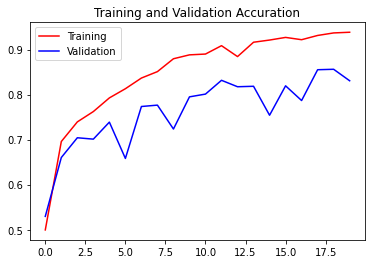

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Training')                             #Plot nilai akurasi training
plt.plot(epochs, val_acc, 'b', label='Validation')                          #Plot nilai akurasi validasi
plt.title('Training and Validation Accuration')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()
plt.show()



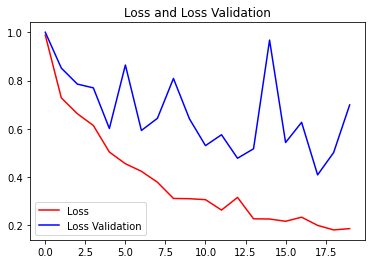

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Loss')                             #Plot nilai akurasi training
plt.plot(epochs, val_loss, 'b', label='Loss Validation')                          #Plot nilai akurasi validasi
plt.title('Loss and Loss Validation')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()
plt.show()

In [ ]:
train_generator.class_indices



{'chick-ready': 0, 'egg_ready': 1, 'hatch_ready': 2}

In [ ]:
validation_generator.class_indices

{'chick-ready': 0, 'egg_ready': 1, 'hatch_ready': 2}

# Uji Coba Model Klasifikasi Gambar Tangan Gunting, Batu, Kertas

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar telur, anak ayam atau telur menetas

Saving 20140430-peeling-eggs-10-1500x1125.jpg to 20140430-peeling-eggs-10-1500x1125.jpg
20140430-peeling-eggs-10-1500x1125.jpg
Gambar Ini Menunujukkan telur


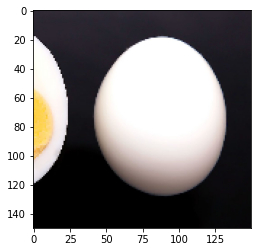

In [ ]:
import numpy as np                                                                #Mengimpor modul numpy
from google.colab import files                                                    #Mengimpor modul import file
from keras.preprocessing import image                                             #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                         #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                       #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Gambar ini Menunjukan Anak Ayam')                                      #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Gambar Ini Menunujukkan telur')                                        #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Gambar Ini Menunjukkan Telur Menetas')                                 #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                      #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"

In [ ]:
classes

array([[1.0000000e+00, 7.4472004e-17, 0.0000000e+00]], dtype=float32)

# Program Klasifikasi Gambar dengan Kriteria Henti(Callback)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)             

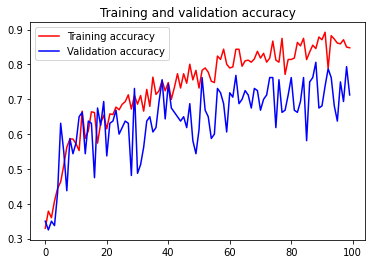

<Figure size 432x288 with 0 Axes>

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>KRITERIA HENTI TRAINING MODEL<<<<<<<<<<<<<<<<<<<<<<<<<
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MEMBANGUN MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MENGKOMPILASI MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
    )

#>>>>>>>>>>>>>>>>>>>>>>>>PLOT AKURASI TRAINING & VALIDASI<<<<<<<<<<<<<<<<<<<<<<<
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

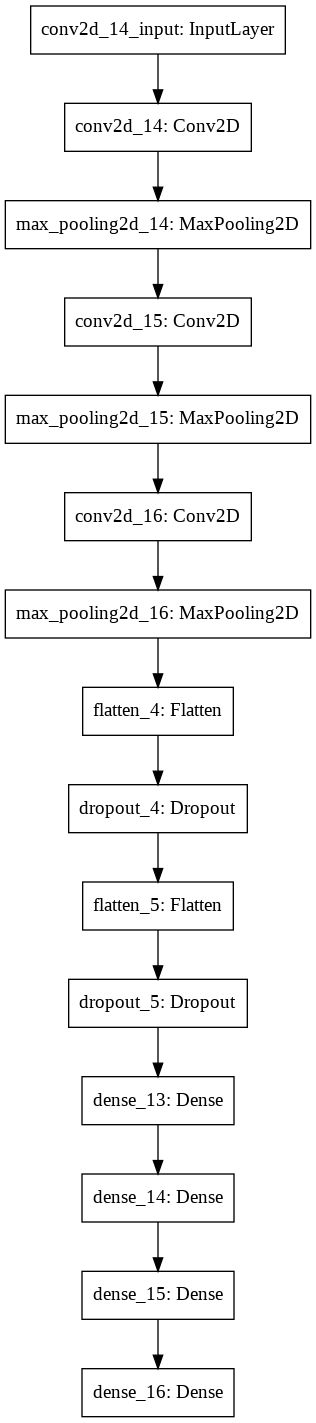

In [ ]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)